## Project 2: Black and White Colorization

### Section 1: Loading and modifying dataset

#### Helper functions

In [159]:
import cv2
import os
import glob
import torch
import numpy as np
from matplotlib import pyplot as plt
import torchvision.transforms as T

torch.set_default_tensor_type('torch.FloatTensor') #Sets default tensor value to float
 
def loadImgsToList():
    img_dir = "./AllImages/face_images/*.jpg" #Function which loads in the face images and returns a list containing RGB values, as well as the number of images read
    files = glob.glob(img_dir)

    data = []
    numImages = 0
    for f1 in files:
        image = cv2.imread(f1)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #cv2 stores colors as BGR instead of RGB for some reason
        data.append(image)
        numImages += 1 #probably unnecessary but I like to avoid using len() for arrays/lists of multiple dimensions
    
    return data, numImages #Capture return as array, number = loadImgsToList()
   
def createTensor(data, numImages): #Function to create an Tensor from a data list, data is unshuffled and unedited from raw
    shape = (numImages, 128, 128, 3) #Shape of the tensor = (number of images, height, width, number of channels), it was recommended online to do it in this order
    tempTensor = torch.zeros(shape) #Populate empty tensor of correct size

    count = 0
    for i in data:
        curData = torch.from_numpy(data[count]) #converts 
        tempTensor[count] = curData
        count += 1
    
    return tempTensor

def shuffleTensor(tempTensor, numImages):
    perm = torch.randperm(numImages)
    shape = (numImages, 128, 128, 3) #Shape of the tensor = (number of images, height, width, number of channels), it was recommended online to do it in this order

    rgbTensor = torch.zeros(shape)
    for i in perm:
        rgbTensor[i] = tempTensor[perm[i]]
    
    return rgbTensor

def randomCrop(inputTensor):
    length = np.random.randint(70,115)
    randCrop = T.RandomCrop(size = (length, length))
    resized = T.Resize(size = (128, 128))
    tempTensor = inputTensor.permute(2, 0, 1)
    tempTensor = resized(randCrop(tempTensor))
    tempTensor = tempTensor.permute(1, 2, 0)
    return tempTensor

def horizontalFlip(inputTensor):
    return torch.fliplr(inputTensor)

def scaleRGBValues(inputTensor):
    scalar = np.random.uniform(.6, 1)
    return inputTensor * scalar

def populateAndScaleDataset(data, numImages, scaleFactor):
    myTensor = createTensor(data, numImages) #Create and shuffle a tensor from the loaded in data
    myTensor = shuffleTensor(myTensor, numImages)
    
    newShape = (scaleFactor*numImages, 128, 128, 3) #Create a holder for the new, scaled Tensor
    newTensor = torch.zeros(newShape)
    
    count = 0 #horizontal counter
    for i in range(numImages): #for each data image
        for j in range(scaleFactor): #make {scaleFactor} more
            if j == 0: #Include the original
                newTensor[count] = myTensor[i]
            else: #else, randomly change the rest
                tempTensor = myTensor[i] #initialize to original
                
                val1 = np.random.uniform(0, 1) #rand val between 0 and 1
                if val1 >= .5: #half of the time, flip it
                    tempTensor = horizontalFlip(tempTensor)
                
                val2 = np.random.uniform(0, 1)
                if val2 >= .5: #half of the time, crop it
                    tempTensor = randomCrop(tempTensor)
                    
                val3 = np.random.uniform(0, 1)
                if val3 >= .5: #half of the time, scale it
                    tempTensor = scaleRGBValues(tempTensor)
            
                newTensor[count] = tempTensor #add it to the holder
            count += 1    #increment count
            
            #NOTE: obviously, the values for when to alter the new images can be adjusted. It's done this way so that multiple transformations can be done on one image
            # Has the flaw of sometimes repeating images, which may be bad for the dataset. Can be easily fixed by adding a default case at the end, but I have omitted that for now
            
    newTensor = shuffleTensor(newTensor, numImages * scaleFactor)     
    return newTensor

def displayImage(data):
    image = data
    #image = cv2.cvtColor(image, cv2.COLOR_LAB2RGB) #gotta convert back

    #Show the image with matplotlib
    plt.imshow(image/255)
    plt.show()

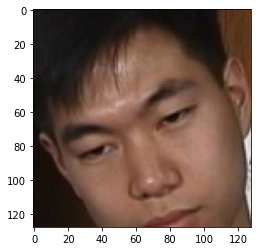

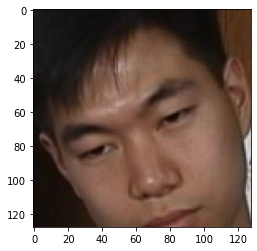

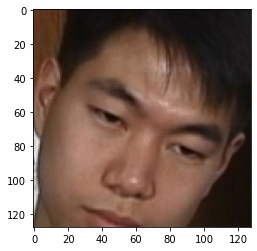

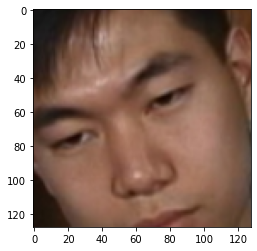

In [160]:
# Testing all transforms

data, numImgs = loadImgsToList()

imgTensor = createTensor(data, numImgs)

imgTensor = shuffleTensor(imgTensor, numImgs)

displayImage(imgTensor[10])

postTensor = scaleRGBValues(imgTensor[10])

displayImage(postTensor)

flipTensor = horizontalFlip(imgTensor[10])

displayImage(flipTensor)

croppedTensor = randomCrop(imgTensor[10])

displayImage(croppedTensor)

In [161]:
# Testing that data is correctly loaded and augmented

data, numImgs = loadImgsToList()

dataset = populateAndScaleDataset(data, numImgs, 10)

print(len(dataset))

7500


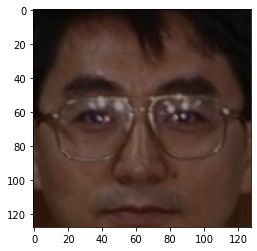

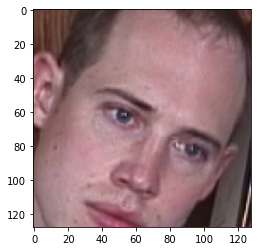

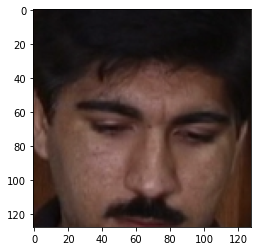

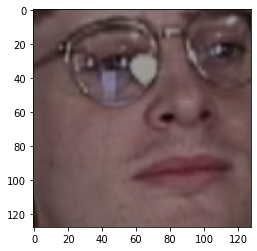

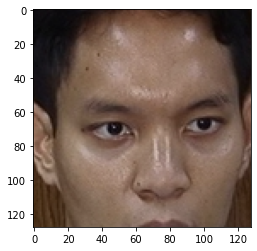

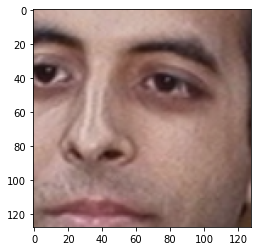

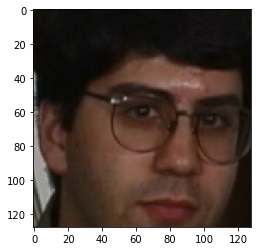

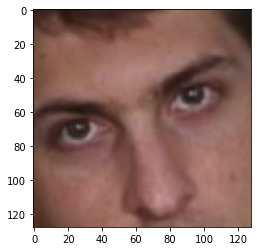

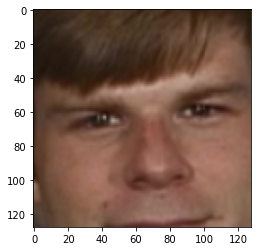

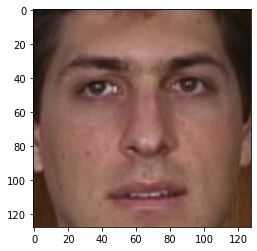

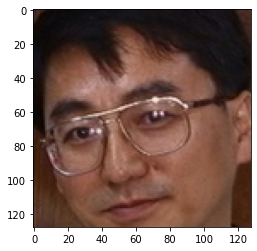

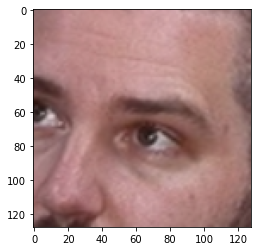

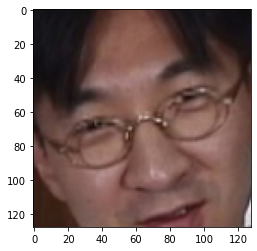

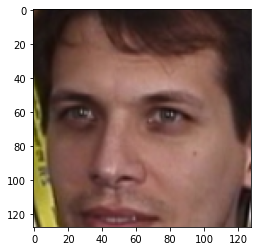

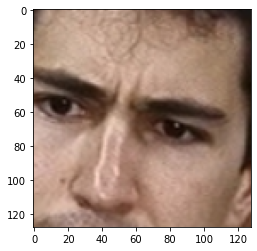

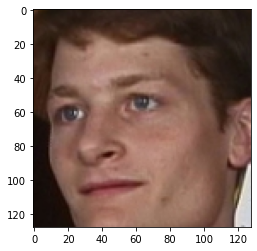

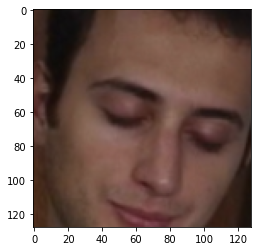

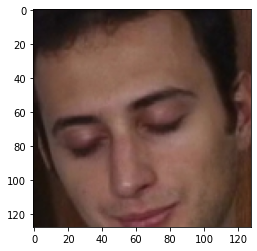

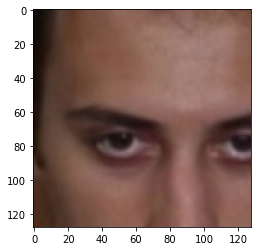

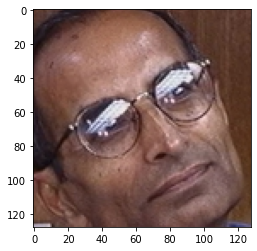

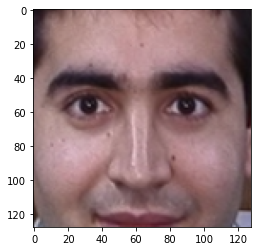

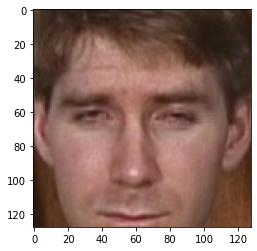

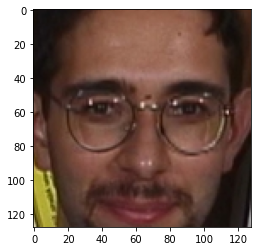

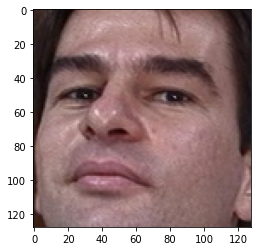

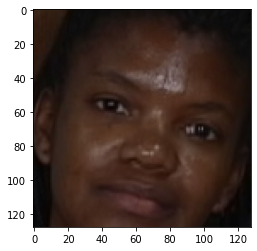

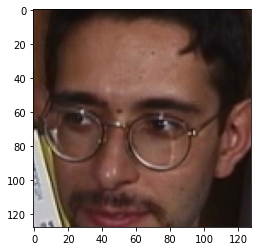

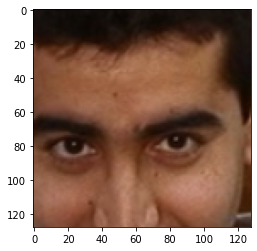

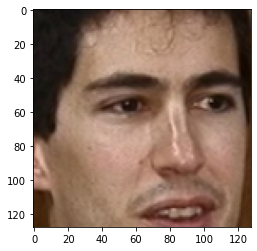

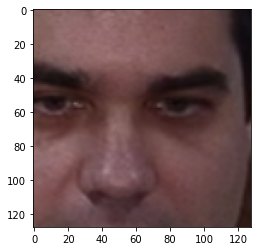

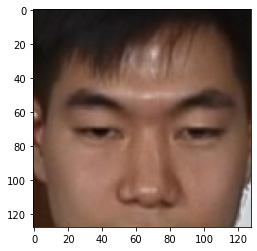

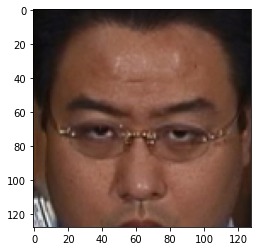

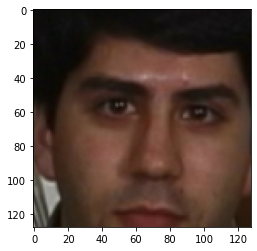

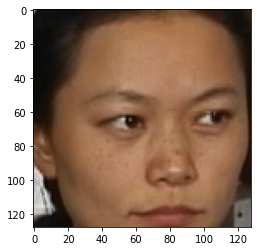

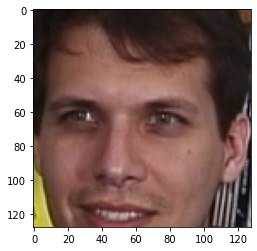

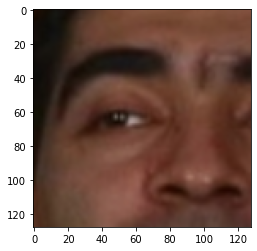

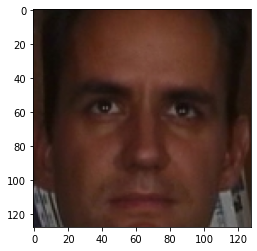

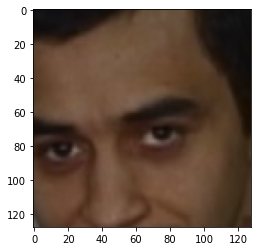

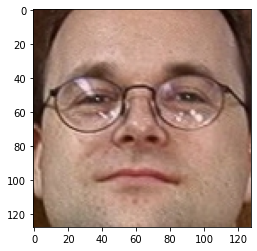

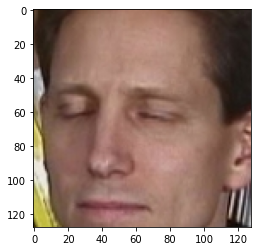

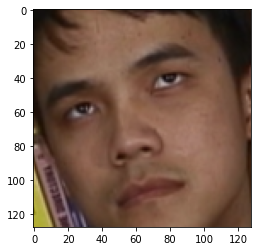

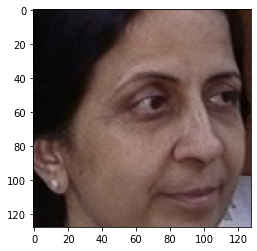

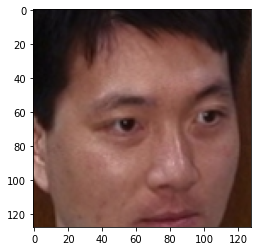

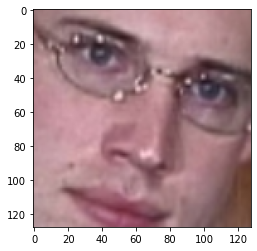

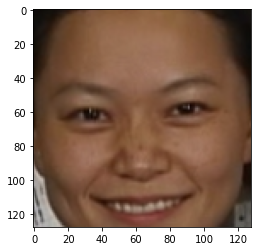

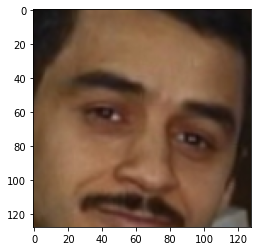

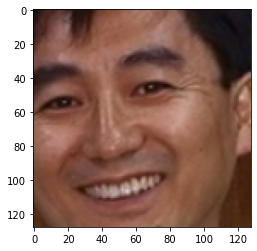

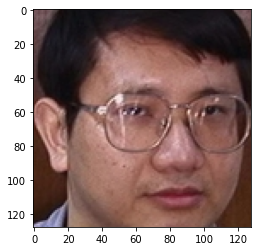

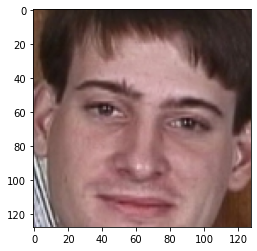

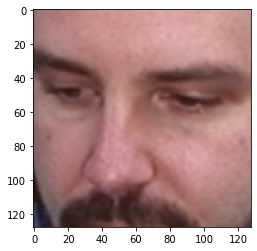

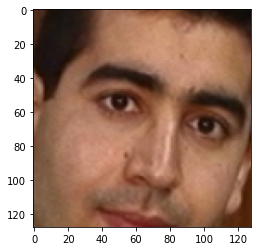

In [155]:
# Display the first fifty images for verification purposes

for i in range(50):
    displayImage(dataset[i])